In [49]:
import pandas as pd
import numpy as np
import requests

In [56]:
import geocoder
def get_coordinates(row):
    # initialize variable to None
    lat_lng_coords = None

    # loop until we get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis(f'{row["Area"]}, Mumbai')
        lat_lng_coords = g.latlng
    
    # return pair lat,long
    return pd.Series([lat_lng_coords[0], lat_lng_coords[1]])
    
# Fill coordinates for each row
neighbourhood[['Latitude','Longitude']] = neighbourhood.apply(get_coordinates, axis=1)
neighbourhood

,Area,Latitude,Longitude
0,Amboli,19.12906,72.84644
1,Chakala,19.10836,72.86236
2,D.N. Nagar,19.12505,72.83248
3,Four Bungalows,19.12640,72.82420
4,Lokhandwala,19.14321,72.82497
...,...,...,...
85,Parel,18.99569,72.83910
86,Gowalia Tank,18.96447,72.81116
87,Dava Bazaar,19.13140,72.92701
88,Dharavi,19.04674,72.85462


In [57]:
import folium
map_cbang = folium.Map(location=[19.12906,72.84644], zoom_start=11)

for lat, lng, label in zip(neighbourhood['Latitude'], neighbourhood['Longitude'], neighbourhood['Area']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cbang)  
    
map_cbang

In [58]:
tables_ln = pd.read_html('https://en.wikipedia.org/wiki/List_of_New_York_locations_by_per_capita_income')

In [59]:
tables_ln[1].head()

,Rank,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New York County,"$111,386","$64,971","$75,629",1585873,763846
1,2.0,Westchester,"$73,159","$79,619","$100,863",949113,347232
2,3.0,Nassau,"$41,387","$93,613","$107,934",1339532,448528
3,4.0,Putnam,"$37,915","$89,218","$101,576",99710,35041
4,5.0,Suffolk,"$35,755","$84,506","$96,220",1493350,499922


In [60]:
ny = pd.DataFrame(tables_ln[1]['County'])

In [2]:
ny


NameError: name 'ny' is not defined

In [62]:
ny.to_csv('NY.csv',index=False)

In [63]:
import geocoder
def get_coordinates(row):
    # initialize variable to None
    lat_lng_coords = None

    # loop until we get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis(f'{row["County"]},NY')
        lat_lng_coords = g.latlng
    
    # return pair lat,long
    return pd.Series([lat_lng_coords[0], lat_lng_coords[1]])
    
# Fill coordinates for each row
ny[['Latitude','Longitude']] = ny.apply(get_coordinates, axis=1)
ny

,County,Latitude,Longitude
0,New York County,40.714550,-74.00714
1,Westchester,40.847430,-73.85576
2,Nassau,42.516420,-73.61126
3,Putnam,43.746540,-73.39724
4,Suffolk,40.877356,-72.85894
...,...,...,...
59,Wyoming,42.827740,-78.08756
60,St. Lawrence,44.177270,-76.16772
61,Allegany,42.092320,-78.49734
62,Franklin,44.447400,-74.06898


In [64]:
ny.to_csv('NY.csv',index=False)

In [65]:
import folium
map_ny = folium.Map(location=[40.714550,-74.00714], zoom_start=11)

for lat, lng, label in zip(ny['Latitude'], ny['Longitude'], ny['County']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    
map_ny

In [66]:
CLIENT_ID = '2GQBW5PR0QFXTOGCHKTRFWJBTGOFOHXW1TRTNRAFURQ5FE1X'
CLIENT_SECRET = '3QH40WMZIIDSQN1RFAVAEQHUIMOQUJPKYPABQVNTSDQJN2YD'
VERSION = 20202808
radius = 500
LIMIT = 100

In [67]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
# Part 1: creating the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
# Part 2: making the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
    
    
    
        
# Part 3 returning only relevant information for each nearby venue and append to the list 
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    return (venues_list)

In [68]:
ny_venues = getNearbyVenues(names = ny['County'],
                              latitudes = ny['Latitude'],
                            longitudes = ny['Longitude'])

New York County
Westchester
Nassau
Putnam
Suffolk
Rockland
Saratoga
Columbia
Dutchess
New York State
Albany
Richmond
Hamilton
Ulster
Ontario
Orange
Warren
Schenectady
Rensselaer
United States
Onondaga
Monroe
Erie
Tompkins
Queens
Schoharie
Tioga
Essex
Genesee
Broome
Madison
Niagara
Wayne
Kings
Greene
Oneida
Chemung
Sullivan
Steuben
Yates
Fulton
Cayuga
Delaware
Livingston
Otsego
Clinton
Montgomery
Washington
Schuyler
Cortland
Chenango
Herkimer
Jefferson
Seneca
Oswego
Chautauqua
Lewis
Cattaraugus
Orleans
Wyoming
St. Lawrence
Allegany
Franklin
Bronx


In [69]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results if v['categories']])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Search for venues within 1Km of radius from the neighbourhood centre point
radius = 1000

# Call the above function
ny_venues = getNearbyVenues(names=ny['County'],
                                   latitudes=ny['Latitude'],
                                   longitudes=ny['Longitude'],
                                   radius=radius)

print(ny_venues.shape)
ny_venues


(2753, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York County,40.71455,-74.00714,Checkers,40.714560,-74.006692,Fast Food Restaurant
1,New York County,40.71455,-74.00714,CityMD,40.714641,-74.007300,Urgent Care Center
2,New York County,40.71455,-74.00714,The Hummus & Pita Co,40.714453,-74.006853,Falafel Restaurant
3,New York County,40.71455,-74.00714,Lot Less,40.714906,-74.007649,Discount Store
4,New York County,40.71455,-74.00714,Dunkin',40.714727,-74.007746,Donut Shop
...,...,...,...,...,...,...,...
2748,Bronx,40.82600,-73.92309,SP+ Parking,40.825564,-73.921240,Parking
2749,Bronx,40.82600,-73.92309,Sheridan Market,40.826660,-73.921320,American Restaurant
2750,Bronx,40.82600,-73.92309,Singa's Famous Pizza,40.825886,-73.920265,Pizza Place
2751,Bronx,40.82600,-73.92309,Legal Aid Society,40.825455,-73.919075,Non-Profit


In [70]:
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
ny_onehot['Neighbourhood'] = ny_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

# group rows by neighbourhood and find frequency of each category
ny_grouped = ny_onehot.groupby('Neighbourhood').mean().reset_index()
print(f'Size: {ny_grouped.shape}')
ny_grouped



Size: (64, 380)


,Neighbourhood,Advertising Agency,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Warehouse,Warehouse Store,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo
0,Albany,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.020833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,Allegany,0.0,0.023256,0.0,0.000000,0.0,0.000000,0.0,0.023256,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,Bronx,0.0,0.020408,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,Broome,0.0,0.021277,0.0,0.000000,0.0,0.000000,0.0,0.021277,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,Cattaraugus,0.0,0.023810,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.023810,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Washington,0.0,0.000000,0.0,0.052632,0.0,0.000000,0.0,0.026316,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.026316,0.0
60,Wayne,0.0,0.043478,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.173913,0.000000,0.0
61,Westchester,0.0,0.021277,0.0,0.000000,0.0,0.021277,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.021277,0.000000,0.000000,0.0
62,Wyoming,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [71]:
tables1 = pd.read_html("https://en.wikipedia.org/wiki/List_of_New_York_locations_by_per_capita_income")

In [72]:
tables1[1]

,Rank,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New York County,"$111,386","$64,971","$75,629",1585873,763846
1,2.0,Westchester,"$73,159","$79,619","$100,863",949113,347232
2,3.0,Nassau,"$41,387","$93,613","$107,934",1339532,448528
3,4.0,Putnam,"$37,915","$89,218","$101,576",99710,35041
4,5.0,Suffolk,"$35,755","$84,506","$96,220",1493350,499922
...,...,...,...,...,...,...,...
59,58.0,Wyoming,"$20,605","$50,075","$58,009",42155,15501
60,59.0,St. Lawrence,"$20,143","$42,303","$50,384",111944,41605
61,60.0,Allegany,"$20,058","$41,305","$49,864",48946,18208
62,61.0,Franklin,"$19,807","$42,050","$50,816",51599,19054


In [73]:
ny_income = tables1[1].drop(['Rank','Per capitaincome','Medianfamilyincome','Population','Number ofhouseholds'],axis =1)

In [74]:
ny_income

,County,Medianhouseholdincome
0,New York County,"$64,971"
1,Westchester,"$79,619"
2,Nassau,"$93,613"
3,Putnam,"$89,218"
4,Suffolk,"$84,506"
...,...,...
59,Wyoming,"$50,075"
60,St. Lawrence,"$42,303"
61,Allegany,"$41,305"
62,Franklin,"$42,050"


In [75]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [76]:
ny_income['Medianhouseholdincome'] = ny_income['Medianhouseholdincome'].apply(clean_currency).astype('float')
ny_income['Medianhouseholdincome_Type'] = ny_income['Medianhouseholdincome'].apply(lambda x: type(x).__name__)

In [77]:
ny_income.drop('Medianhouseholdincome_Type',axis=1)

,County,Medianhouseholdincome
0,New York County,64971.0
1,Westchester,79619.0
2,Nassau,93613.0
3,Putnam,89218.0
4,Suffolk,84506.0
...,...,...
59,Wyoming,50075.0
60,St. Lawrence,42303.0
61,Allegany,41305.0
62,Franklin,42050.0


In [78]:
ny_income.to_csv('NY_income1.csv')

In [79]:
df_ny_income = pd.read_csv('NY_income1.csv')

In [80]:
df_ny_income = df_ny_income.drop(['Unnamed: 0','Medianhouseholdincome_Type'],axis =1)

In [81]:
df_ny_income

,County,Medianhouseholdincome
0,New York County,64971.0
1,Westchester,79619.0
2,Nassau,93613.0
3,Putnam,89218.0
4,Suffolk,84506.0
...,...,...
59,Wyoming,50075.0
60,St. Lawrence,42303.0
61,Allegany,41305.0
62,Franklin,42050.0


In [82]:
df_ny_population = pd.read_csv('NY_population.csv')

In [83]:
df_ny_population

,County,Population
0,New York County,1585873
1,Westchester,949113
2,Nassau,1339532
3,Putnam,99710
4,Suffolk,1493350
...,...,...
59,Wyoming,42155
60,St. Lawrence,111944
61,Allegany,48946
62,Franklin,51599


## Neighbourhood segmentation

In [118]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [121]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = ny_grouped['Neighbourhood']

for ind in np.arange(ny_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany,Government Building,Office,Capitol Building,Park,Hotel,Clothing Store,Church,Plaza,Gym / Fitness Center,Building
1,Allegany,Cosmetics Shop,Fraternity House,Park,Bar,Office,Cemetery,Mexican Restaurant,Ice Cream Shop,Deli / Bodega,Organic Grocery
2,Bronx,Residential Building (Apartment / Condo),Courthouse,Deli / Bodega,Business Service,Building,Government Building,Dry Cleaner,Doctor's Office,Pizza Place,Multiplex
3,Broome,Farm,Bed & Breakfast,Event Space,Cemetery,History Museum,Automotive Shop,Bookstore,Campground,Ice Cream Shop,Diner
4,Cattaraugus,Campground,Automotive Shop,City Hall,Church,Factory,Office,Bank,Discount Store,Lounge,Racetrack


C:\Users\JAYSIBI\AppData\Local\Temp\ipykernel_5028\2932657092.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ny_grouped_clustering = ny_grouped.drop('Neighbourhood', 1)
D:\Softwares\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 2 3 4 5 6 7 8 9 

Text(0.5, 1.0, 'Elbow Method For Optimal k')

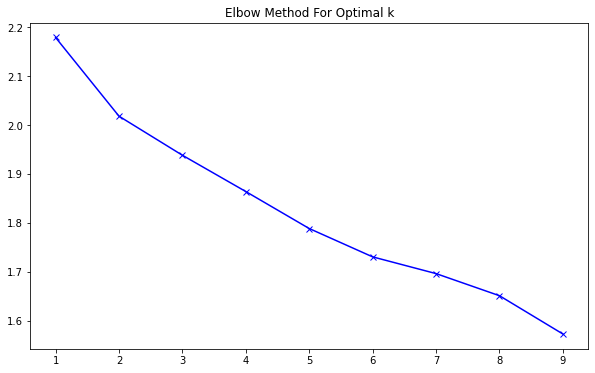

In [122]:
ny_grouped_clustering = ny_grouped.drop('Neighbourhood', 1)
sum_of_squared_distances = []
K = range(1,10)

for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(ny_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.title('Elbow Method For Optimal k')

In [123]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=100).fit(ny_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 3, 4, 1, 2, 1, 1, 1, 3, 3])

In [124]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ny_merged = ny

# merge madrid_grouped with df_madrid to add latitude/longitude for each neighbourhood
ny_merged = ny_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='County')

ny_merged.head()

,County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York County,40.714550,-74.00714,4,Residential Building (Apartment / Condo),Building,Doctor's Office,Sandwich Place,Japanese Restaurant,Urgent Care Center,Tech Startup,Pizza Place,Smoke Shop,Falafel Restaurant
1,Westchester,40.847430,-73.85576,4,Pizza Place,Doctor's Office,Nail Salon,Bar,Lawyer,Dentist's Office,Deli / Bodega,Bakery,Salon / Barbershop,Building
2,Nassau,42.516420,-73.61126,3,Farm,Automotive Shop,Pizza Place,Bar,Deli / Bodega,Hardware Store,Field,Gas Station,Breakfast Spot,Convenience Store
3,Putnam,43.746540,-73.39724,2,Campground,Lake,Scenic Lookout,Harbor / Marina,Discount Store,Resort,School,Historic Site,Castle,Bar
4,Suffolk,40.877356,-72.85894,1,Building,Automotive Shop,Gas Station,Deli / Bodega,Government Building,Hostel,Campground,Medical Lab,Student Center,Furniture / Home Store


In [130]:
# create map
import matplotlib.pyplot as plt
from matplotlib import cm
map_clusters = folium.Map(location=[40.714550,-74.00714], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, area, cluster in zip(np_merged['Latitude'], np_merged['Longitude'], np_merged['Neighbourhood'], np_merged['Cluster Labels']):
    label = folium.Popup(remove_accents(str(area)) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'colors' is not defined

## Cluster 0

In [131]:
ny_merged.loc[ny_merged['Cluster Labels'] == 0, ny_merged.columns[[0] + list(range(4, ny_merged.shape[1]))]]

,County,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Columbia,Scenic Lookout,Professional & Other Places,Miscellaneous Shop,Indie Movie Theater,Boat or Ferry,Dog Run,Thrift / Vintage Store,Other Great Outdoors,School,Tech Startup
8,Dutchess,Building,Professional & Other Places,College Residence Hall,General Travel,Gift Shop,Golf Course,Medical Center,Doctor's Office,Donut Shop,Gas Station
12,Hamilton,Café,Pizza Place,Office,Bank,Sandwich Place,Sports Bar,Supermarket,Hardware Store,Salad Place,Grocery Store
20,Onondaga,Other Great Outdoors,Credit Union,Playground,Church,Gym,College Residence Hall,Bank,Post Office,Park,Strip Club
22,Erie,Dentist's Office,Pool,Bank,Coffee Shop,Gift Shop,Salon / Barbershop,Other Great Outdoors,Gas Station,Gym,Church
27,Essex,Boat or Ferry,Trail,Post Office,Antique Shop,Deli / Bodega,Café,Island,Nature Preserve,Beach,Town Hall
30,Madison,Antique Shop,American Restaurant,Food Truck,Lake,Building,Other Event,Gas Station,Breakfast Spot,Mountain,Professional & Other Places
47,Washington,Auto Dealership,Gift Shop,Antique Shop,Hardware Store,Basketball Court,Park,Café,Thrift / Vintage Store,Factory,Clothing Store
52,Jefferson,American Restaurant,Church,Event Space,Discount Store,Gym,Medical Center,Lake,Fire Station,Motel,Breakfast Spot


## Cluster 1

In [136]:
ny_merged.loc[ny_merged['Cluster Labels'] == 1, ny_merged.columns[[0] + list(range(4, _merged.shape[1]))]]

,County,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Suffolk,Building,Automotive Shop,Gas Station,Deli / Bodega,Government Building,Hostel,Campground,Medical Lab,Student Center,Furniture / Home Store
5,Rockland,Campground,River,American Restaurant,Hardware Store,Bed & Breakfast,Brewery,Other Great Outdoors,Supermarket,Italian Restaurant,EV Charging Station
10,Albany,Government Building,Office,Capitol Building,Park,Hotel,Clothing Store,Church,Plaza,Gym / Fitness Center,Building
11,Richmond,Lounge,Building,Campground,Grocery Store,Church,Rest Area,Zoo,Construction & Landscaping,Brewery,Bus Station
16,Warren,Antique Shop,Building,Furniture / Home Store,Field,Campground,Church,Hardware Store,Storage Facility,Resort,Bar
18,Rensselaer,Moving Target,Park,Train Station,Platform,Coffee Shop,Dive Bar,Massage Studio,Newsstand,Government Building,Driving School
23,Tompkins,Factory,Motel,Office,Farm,River,Outdoor Supply Store,Building,Pharmacy,Cemetery,Doctor's Office
25,Schoharie,Government Building,Bank,Fire Station,Campground,Gas Station,Residential Building (Apartment / Condo),Brewery,Museum,Event Space,Donut Shop
26,Tioga,Beer Garden,Farmers Market,Racetrack,Building,Miscellaneous Shop,Thrift / Vintage Store,Furniture / Home Store,Storage Facility,Funeral Home,Playground
29,Broome,Farm,Bed & Breakfast,Event Space,Cemetery,History Museum,Automotive Shop,Bookstore,Campground,Ice Cream Shop,Diner


In [139]:
# From now on, we work only with residential neighbourhoods
residential_cluster_id = 2
ny_residential = ny[ny['County'].isin(ny_merged.loc[ny_merged['Cluster Labels'] == residential_cluster_id, 'County'])]

# Category ID in Foursquare API
supermarket_category = '52f2ab2ebcbc57f1066b8b46'

# Function to count the number of market-like venues in a given neighbourhood
def getMarketVenues(row):
    
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        row['Latitude'], 
        row['Longitude'],
        supermarket_category,
        radius, 
        LIMIT)

    # make the GET request and get get length of venues
    count = len(requests.get(url).json()["response"]['venues'])

    # return count
    return pd.Series(count)
    
# Apply the above function on each residential neighbourhood
ny_residential['Number of Markets'] =ny_residential.apply(getMarketVenues, axis=1)
ny_residential.head()

C:\Users\JAYSIBI\AppData\Local\Temp\ipykernel_5028\2885990055.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_residential['Number of Markets'] =ny_residential.apply(getMarketVenues, axis=1)


,County,Latitude,Longitude,Number of Markets
3,Putnam,43.74654,-73.39724,0
15,Orange,42.30562,-77.04871,0
28,Genesee,42.07776,-78.20688,0
33,Kings,43.15375,-73.85575,0
57,Cattaraugus,42.32925,-78.86829,0


In [140]:
ny_residential = ny_residential.merge(df_ny_income, how='left', on='County')

# Left join with population dataframe
ny_residential = ny_residential.merge(df_ny_population, how='left', on='County')
ny_residential['Population'] = ny_residential['Population'].astype(int)

# Calculate how many people per one market live in each residential neighbourhood
ny_residential['People per Market'] = ny_residential.apply(lambda x: (x['Population'] // x['Number of Markets']) if x['Number of Markets'] > 0 else x['Population'], axis=1)

print(ny_residential.shape)
ny_residential.head()

(5, 7)


,County,Latitude,Longitude,Number of Markets,Medianhouseholdincome,Population,People per Market
0,Putnam,43.74654,-73.39724,0,89218.0,99710,99710
1,Orange,42.30562,-77.04871,0,69523.0,372813,372813
2,Genesee,42.07776,-78.20688,0,49750.0,60079,60079
3,Kings,43.15375,-73.85575,0,43567.0,2504700,2504700
4,Cattaraugus,42.32925,-78.86829,0,42466.0,80317,80317


In [1]:
# Function to draw a scatter plot of residential neighbourhoods by household income and population per market.
import seaborn as sns
def scatter_text(x, y, text_column, data, title, xlabel, ylabel):
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, data=data, size=8, legend=False)
    # Add text besides each point
    texts = [p1.text(data[x][line], data[y][line], 
             data[text_column][line], horizontalalignment='left', 
             size='small', color='blue') for line in range(0,data.shape[0])]
   
    
    plt.title(title, size=18)
    plt.xlabel(xlabel, size=14)
    plt.ylabel(ylabel, size=14)
    return p1

plt.figure(figsize=(20,10))


avg_people_per_market = ny_residential['People per Market'].median()
max_people_per_market = ny_residential['People per Market'].max()
avg_income = ny_residential['Medianhouseholdincome'].median()

plt.axhline(y=avg_income, color='r', linestyle='--')
plt.axvline(x=avg_people_per_market, color='r', linestyle='--')


plt.fill_between(x=np.arange(avg_people_per_market, max_people_per_market), y1=0, y2=avg_income, color='lightgreen')


scatter_text('People per Market', 'Medianhouseholdincome', 'County',
             data = ny_residential, 
             title = 'Madrid residential neighbourhoods', 
             xlabel = 'People per market',
             ylabel = 'Household income (€)')

NameError: name 'plt' is not defined